In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from eyevents.trajectory import Trajectory
from eyevents.detector import Detector

%matplotlib inline

_plot = lambda x, t: x.iloc[:250].plot(x='time', figsize=(10, 7), title = t)

In [2]:
settings = dict(
    columns=dict(time = 't', porx = 'x', pory = 'y'),
    common=dict(
        size=[59, 33],
        resolution=[1920, 1080],
        distance=50,
        adjust_time=True, 
        normalized=True,
        reference_point=None,
    ),
    velocity=dict(
        velocity_type='analytical',
        window=7    
    ),
    loading = dict(sep=',', decimal='.', skiprows=0, header=0),
    smoothing = dict(
        window=15,
        center=False,
        method='savgol',
        order=2,
        fillna=False
    ),
    oculus = dict(
        velocity_threshold=30,
    )
)
path = 'E:/RDir/gosniias/input/15_05_2018/ivs2.txt'
tr1 = Trajectory(path, settings)
df4 = Detector.IVT(tr1.df, tr1.settings)

In [3]:
df4.head()

,time,porx,pory,dt,xAng,yAng,distAng,velAng,accelAng,event
0,0.00000,432.828424,493.827586,NaN,13.921807,16.261975,0.340426,0.000000,0.000000,Fixation
1,0.01612,423.774002,496.820761,0.01612,13.621041,16.358512,0.293156,18.185838,0.000000,Fixation
2,0.03223,415.749973,498.294673,0.01611,13.353862,16.406015,0.251216,15.593764,-160.898463,Fixation
3,0.04834,408.756337,498.249323,0.01611,13.120507,16.404553,0.217708,13.513815,-129.109162,Fixation
4,0.06446,402.793094,496.684711,0.01612,12.921183,16.354126,0.196935,12.216785,-80.460910,Fixation


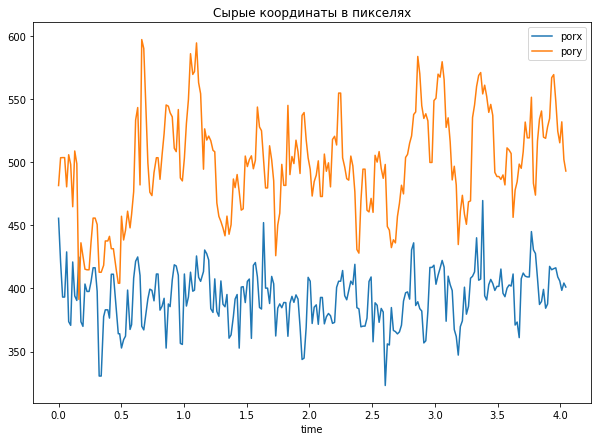

In [4]:
_plot(tr1.raw_df, 'Сырые координаты в пикселях')

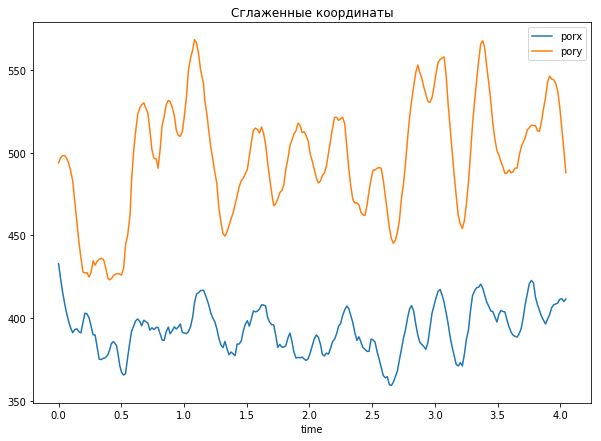

In [5]:
_plot(tr1.df[['time', 'porx', 'pory']], 'Сглаженные координаты')

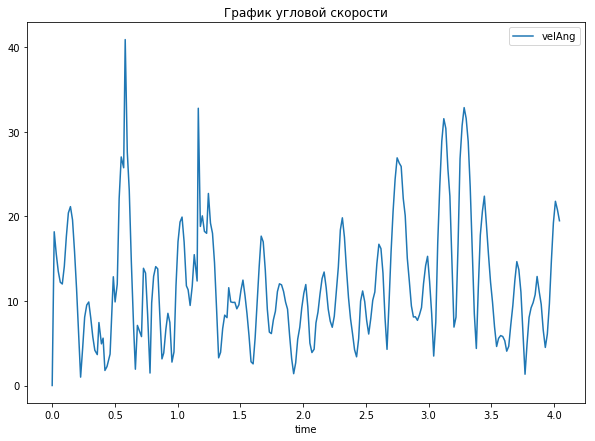

In [6]:
_plot(tr1.df[['time', 'velAng']], 'График угловой скорости')

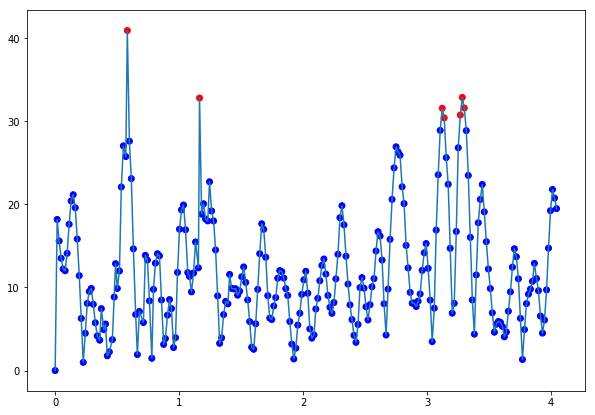

In [7]:
colors = {'Fixation': 'blue', 'Saccade': 'red'}
buf = df4[:250].copy()

plt.figure(figsize=(10,7))
plt.plot(buf['time'], buf['velAng'])
plt.scatter(buf['time'], buf['velAng'], c = buf['event'].apply(lambda x: colors[x]))